In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 1. Load Data

In [123]:
df = pd.read_csv('cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [124]:
df.info() 

<class 'pandas.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   str    
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   str    
 5   seller_type         8128 non-null   str    
 6   transmission        8128 non-null   str    
 7   owner               8128 non-null   str    
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   str    
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), str(6)
memory usage: 762.1 KB


In [125]:
df.describe().loc[['mean', 'min', 'max']]

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [126]:
# Check for missing values
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [127]:
df.describe(include='O') # Identify categorical features

C:\Users\Y TECH\AppData\Local\Temp\ipykernel_4632\69086417.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='O') # Identify categorical features


,name,fuel,seller_type,transmission,owner,max_power
count,8128,8128,8128,8128,8128,7913
unique,2058,4,3,2,5,320
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
freq,129,4402,6766,7078,5289,377


In [128]:
# Check unique values in categorical features
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

<StringArray>
['Diesel', 'Petrol', 'LPG', 'CNG']
Length: 4, dtype: str
<StringArray>
['Individual', 'Dealer', 'Trustmark Dealer']
Length: 3, dtype: str
<StringArray>
['Manual', 'Automatic']
Length: 2, dtype: str
<StringArray>
[         'First Owner',         'Second Owner',          'Third Owner',
 'Fourth & Above Owner',       'Test Drive Car']
Length: 5, dtype: str


## 3. Covnvert categorical features / DropNA

In [129]:
# convert categorical features to numerical
df = pd.get_dummies(df, columns=['fuel', 'seller_type'], dtype=int)
df['owner'] = df['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power'] = df['max_power'].fillna(df['max_power'].median())
df.head()

,name,year,selling_price,km_driven,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,3,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0


In [130]:
df['car_age'] = 2026 - df['year']
df.head()

,name,year,selling_price,km_driven,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,12
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,12
2,Honda City 2017-2020 EXi,2006,158000,140000,0,3,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,20
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,16
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,19


In [131]:
df.dropna(inplace=True)
df.shape

(7907, 18)

In [132]:
df['seats'] = df['seats'].astype(int)
df.drop(columns=['name', 'year', 'seller_type_Dealer', 'fuel_LPG'], inplace=True)

## Feature Scaling

In [133]:
df['km_driven'] = df['km_driven'] / 1000
df['selling_price'] = df['selling_price'] / 1000
df.head()

,selling_price,km_driven,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,car_age
0,450.0,145.5,0,1,23.40,1248.0,74.00,5,0,1,0,1,0,12
1,370.0,120.0,0,2,21.14,1498.0,103.52,5,0,1,0,1,0,12
2,158.0,140.0,0,3,17.70,1497.0,78.00,5,0,0,1,1,0,20
3,225.0,127.0,0,1,23.00,1396.0,90.00,5,0,1,0,1,0,16
4,130.0,120.0,0,1,16.10,1298.0,88.20,5,0,0,1,1,0,19


In [134]:
df.to_csv('cleaned_car_data.csv', index=False)

## Plotting

<Axes: xlabel='selling_price', ylabel='Count'>

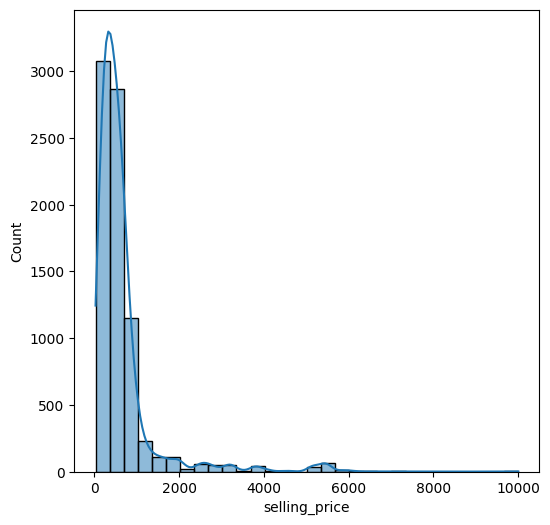

In [135]:
plt.figure(figsize=(6, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)

## Model

In [ ]:
X_

: 